In [1]:
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Model repository
### Sample distribution

In [2]:
# Load model repository
M=100
N=40
flag = 'median'
def load(M,N,flag):
    filepath = 'repository/model_repository_'+str(M)+'_'+str(N)+'_'+flag+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    print('M:',len(df))
    print('N:',len(df.columns)-1)
    print(df.head())
    return df

df_median = load(M,N,flag)

FileNotFoundError: [Errno 2] File repository/model_repository_100_40_median.csv does not exist: 'repository/model_repository_100_40_median.csv'

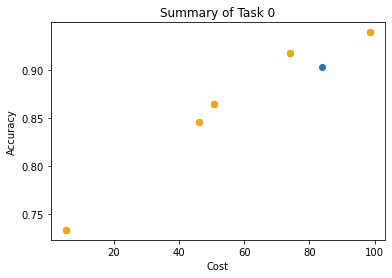

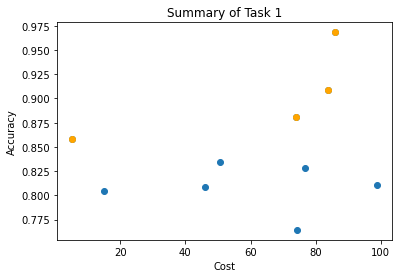

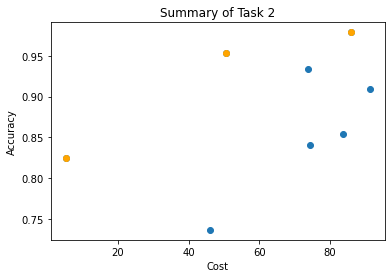

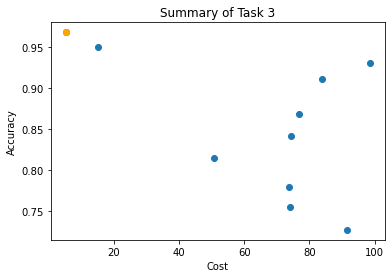

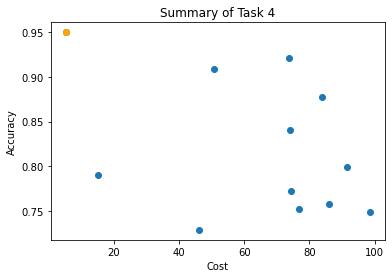

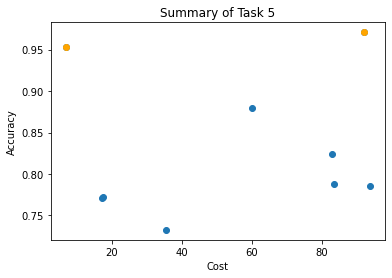

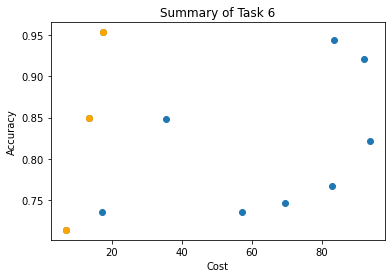

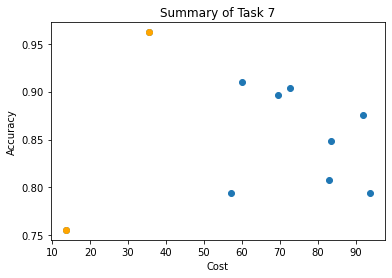

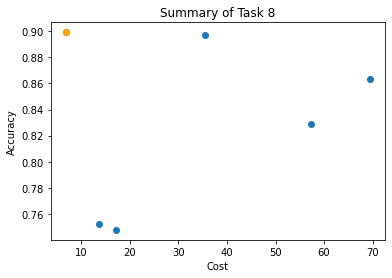

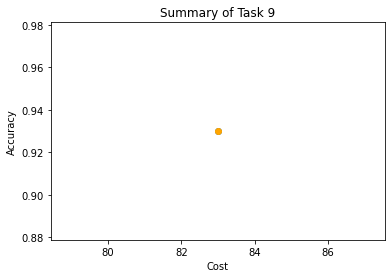

In [9]:
# get pareto
def TwoDimensionsPD(data):
    map_dict = {}
    columns=data.columns
    sorted_data = data.sort_values(by='cost')
    index = list(sorted_data.index)

    map_dict[index[0]] = 1
    cutt_off = sorted_data[columns[0]][0]
    for i in range(1, len(sorted_data)):
        if sorted_data[columns[0]][i] > cutt_off:
            cutt_off = sorted_data[columns[0]][i]
            map_dict[index[i]] = 1
    return map_dict

data = df_median.loc[:,['T0','cost']]
data.dropna(inplace=True)
# print(data)

def plot(df):
    for i in range(10):
        data = df.loc[:,['T'+str(i),'cost']]
        data.dropna(inplace=True)
        map_dict = TwoDimensionsPD(data)

        fig, ax = plt.subplots()
        ax.scatter(df['cost'], df['T'+str(i)])
        ax.scatter(df.loc[map_dict.keys(),'cost'], df.loc[map_dict.keys(),'T'+str(i)],c='orange')
        plt.title('Summary of Task '+str(i))
        plt.xlabel('Cost')
        plt.ylabel('Accuracy')
        plt.show()
plot(df_median)

In [10]:
# Load model repository
M=100
N=40
flag = 'max'
df_max = load(M,N,flag)

data = df_max.loc[:,['T0','cost']]
data.dropna(inplace=True)
print(data)

M: 98
N: 40
          T0        T1        T4        T2  T3  T5  T9  T6  T7  T8  ...  T31  \
M0  0.737765  0.971935  0.958266       NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
M9  0.852308  0.803239       NaN       NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
M7  0.723202  0.831963  0.753495       NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
M2  0.848006       NaN  0.933948  0.895939 NaN NaN NaN NaN NaN NaN  ...  NaN   
M8  0.830802  0.792171  0.815926       NaN NaN NaN NaN NaN NaN NaN  ...  NaN   

    T32  T34  T33  T35  T36  T37  T39  T38       cost  
M0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  58.404915  
M9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  78.343474  
M7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  26.640110  
M2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  51.199316  
M8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  48.045498  

[5 rows x 41 columns]
           T0       cost
M0   0.737765  58.404915
M9   0.852308  78.343474
M7   0.723202  26.640110
M2   0.848006  51.199316
M8   0.830802  48.04549

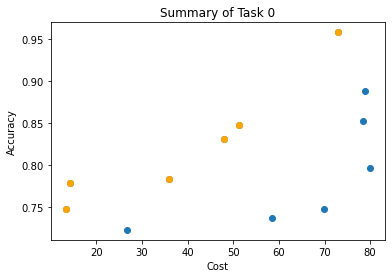

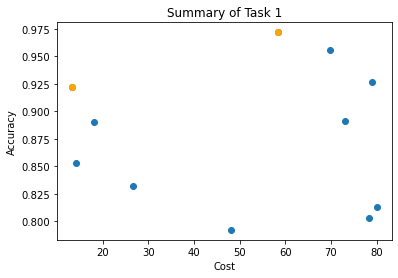

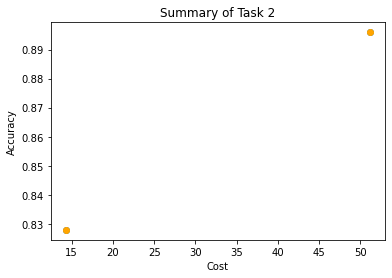

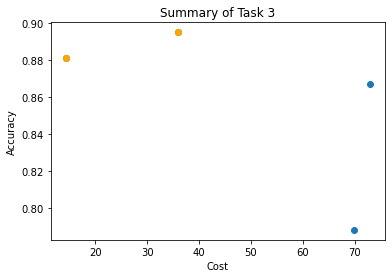

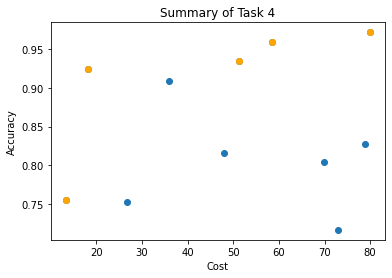

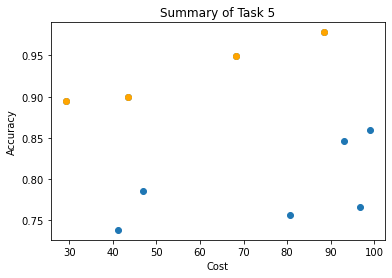

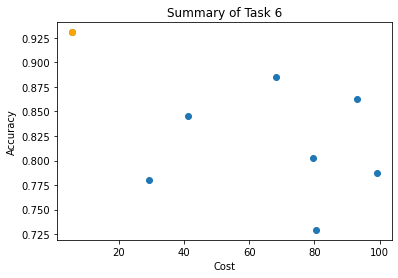

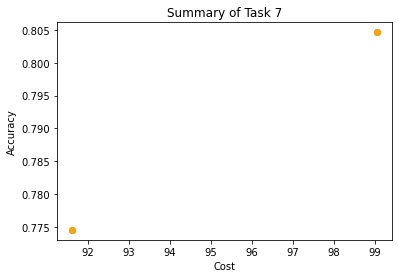

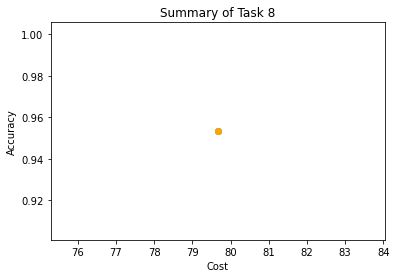

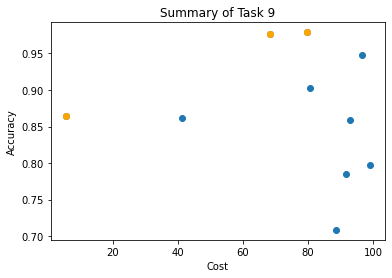

In [11]:
plot(df_max)

### General distribution

['T0', 'T1', 'T2', 'T3']


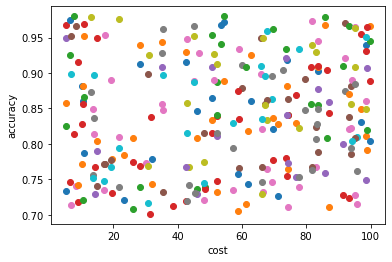

['T0', 'T1', 'T4', 'T2']


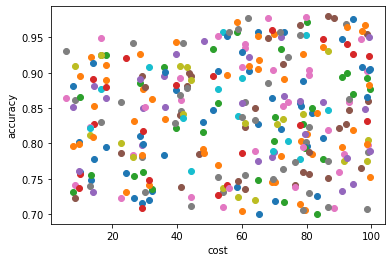

In [12]:
from pandas.plotting import scatter_matrix

def scatter(df):
    
    columns = list(df.columns)[:-1]
    print(columns[:4])
    fig, ax = plt.subplots()
    for c in columns:
        ax.scatter(df['cost'], df[c])
    plt.xlabel("cost")
    plt.ylabel('accuracy')
    plt.show()

scatter(df_median)
scatter(df_max)

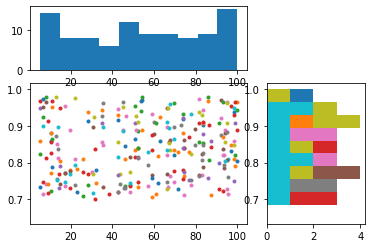

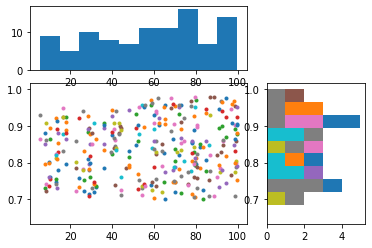

In [14]:
def scatter_hist(df):
    scatter_axes = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
    x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                                   sharex=scatter_axes)
    y_hist_axes = plt.subplot2grid((3, 3), (1, 2), rowspan=2,
                                   sharey=scatter_axes)

    # scatter_axes.plot(x, y, '.')
    columns = list(df.columns)[:-1]
    for c in columns:
        scatter_axes.plot(df['cost'], df[c], '.')
        y_hist_axes.hist(df[c], orientation='horizontal',range=(0.65,1))
    x_hist_axes.hist(df['cost'])
    plt.show()

scatter_hist(df_median)
scatter_hist(df_max)

### Distribution on the number of model assinments to each task

In [103]:
count_task = df_median.count()
count_task_max = df_max.count()
count_task_max.head()

T0    12
T1    11
T4    11
T2     2
T3     4
dtype: int64

(array([4., 4., 3., 3., 0., 7., 1., 4., 7., 7.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <a list of 10 Patch objects>)

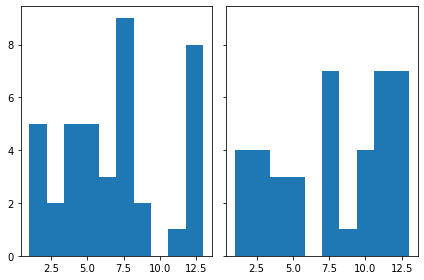

In [104]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 10
# We can set the number of bins with the `bins` kwarg
axs[0].hist(count_task[:-1], bins=n_bins)
axs[1].hist(count_task_max[:-1], bins=n_bins)

### Distribution of model capability

In [105]:
count_m = df_median.iloc[:,:-1].T.count()
count_m_max = df_max.iloc[:,:-1].T.count()
count_m_max.head()

M0    3
M9    2
M7    3
M2    3
M8    3
dtype: int64

(array([ 7., 14., 36., 34.,  6.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

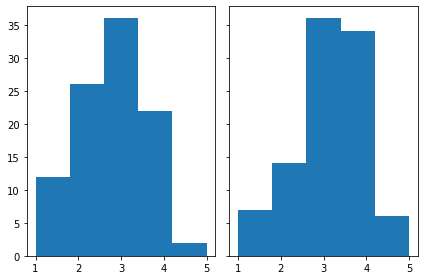

In [106]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 5
# We can set the number of bins with the `bins` kwarg
axs[0].hist(count_m[:-1], bins=n_bins)
axs[1].hist(count_m_max[:-1], bins=n_bins)

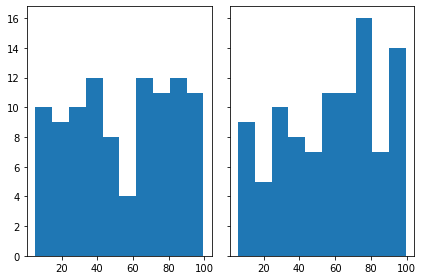

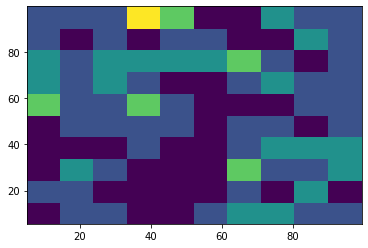

In [108]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df_median['cost'])
axs[1].hist(df_max['cost'])

fig, ax = plt.subplots()
ax.hist2d(list(df_median['cost'])[:-1],df_max['cost'])
plt.show()

### Pareto Ratio

In [17]:
path = 'repository/model_pareto_summary.csv'
df_summary = pd.read_csv(path,index_col=0)
query_range = [50,100,150,200]

In [16]:
def getData(df,M,N,flag,query_range):
    df_summary = df.loc[df['M']==M]
    df_summary = df_summary.loc[df['N']==N]
    df_summary = df_summary.loc[df_summary['flag']==flag]
    print(df_summary.head())
    data = [df_summary.loc[df_summary['#query'] == n,'ratio'] for n in query_range]
    return data

In [18]:
def boxplot(data,M,N,query_range):
    box_colors = ['darkkhaki', 'royalblue']
    fig, ax = plt.subplots()
    ax.set_title('Pareto Ratio with Different Number of Queries (M='+str(M)+',N='+str(N)+')')
    bp = ax.boxplot(data)
    plt.xticks(range(1,len(query_range)+1), query_range)
    plt.xlabel("#queries")
    plt.ylabel("Pareto ratio")
    plt.show()

     M   N  #query  #predicates  #pareto   ratio    flag
0  100  40      50          188      186  0.9894  median
1  100  40      50          204      194  0.9510  median
2  100  40      50          199      195  0.9799  median
3  100  40      50          234      221  0.9444  median
4  100  40      50          239      228  0.9540  median
     M   N  #query  #predicates  #pareto   ratio flag
5  100  40      50          168      165  0.9821  max
6  100  40      50          184      182  0.9891  max
7  100  40      50          216      208  0.9630  max
8  100  40      50          194      184  0.9485  max
9  100  40      50          212      207  0.9764  max
[0    0.9894
1    0.9510
2    0.9799
3    0.9444
4    0.9540
Name: ratio, dtype: float64, 10    0.9556
11    0.9607
12    0.9787
13    0.9582
Name: ratio, dtype: float64, 19    0.9664
20    0.9512
21    0.9470
22    0.9694
23    0.9459
Name: ratio, dtype: float64, 29    0.9637
30    0.9604
31    0.9742
32    0.9706
33    0.9558
Name

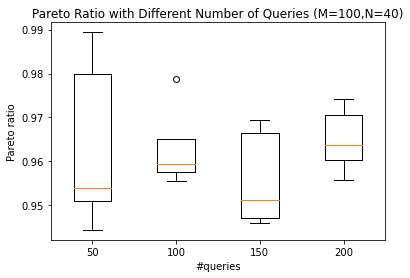

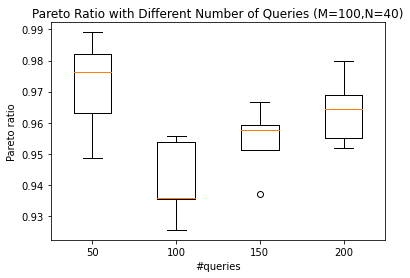

In [19]:
M=100
N=40
flag='median'
data = getData(df_summary,M,N,flag,query_range)
data_max = getData(df_summary,M,N,'max',query_range)
print(data)
boxplot(data,M,N,query_range)
boxplot(data_max,M,N,query_range)

## Check task with non-pareto model

In [115]:
path = 'repository/non_pareto_query_summary.csv'
df_non_pareto = pd.read_csv(path,index_col=0)
df_non_pareto.head()

,query,predicate,flag
0,(T9 & T21) | T25 & T6 | (T19 | T2) | T10 | T22...,T10.M33,0
1,T12 | T38 | T34 | T14,T14.M35,0
2,(T17 & T30) & (T7 & T33) & T19 & T29 & T26,T19.M50|T17.M50,0
3,(T18 | T38 | T35 | T32 & T25 & T11),T35.M91,0
4,T28 & (T5 | T18) & (T28 | T27 & T24) & T32 & (...,T16.M51|T34.M84|T33.M84,0


In [116]:
df_np_median = df_non_pareto.loc[df_non_pareto['flag']==0]
df_np_max = df_non_pareto.loc[df_non_pareto['flag']==1]

In [152]:
# get pareto
def TwoDimensionsPD(data):
    data.dropna(inplace=True)
    map_dict = {}
    columns=data.columns
    sorted_data = data.sort_values(by='cost')
    index = list(sorted_data.index)

    map_dict[index[0]] = 1
    cutt_off = sorted_data[columns[0]][0]
    for i in range(1, len(sorted_data)):
        if sorted_data[columns[0]][i] > cutt_off:
            cutt_off = sorted_data[columns[0]][i]
            map_dict[index[i]] = 1
    return map_dict

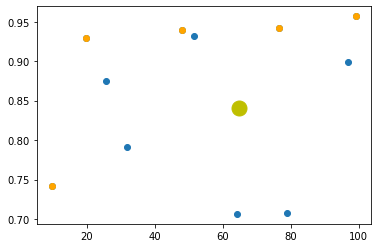

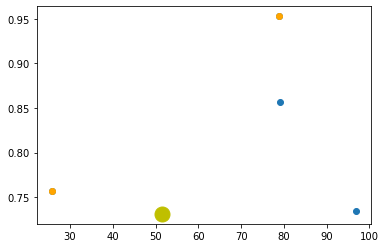

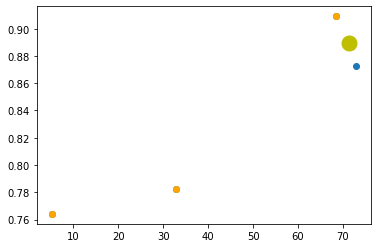

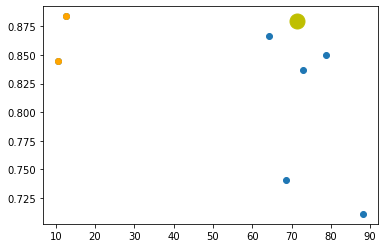

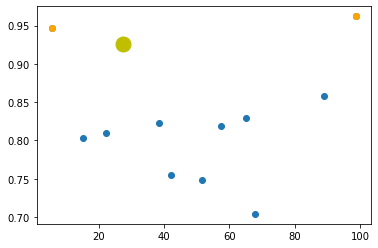

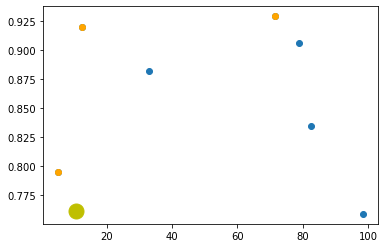

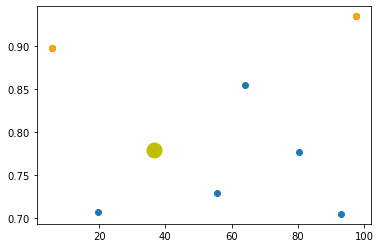

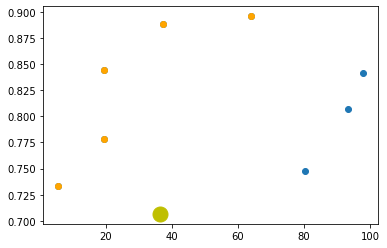

In [153]:
for i in range(5):
    predicates = df_np_median.loc[i,'predicate']
    query = df_np_median.loc[i,'query']
    predicate = predicates.split('|')
    for p in predicate:
        t, m = p.split('.')
        d = df_median.loc[:,[t,'cost']]
        map_dict = TwoDimensionsPD(d)
        fig, ax = plt.subplots()
        ax.scatter(df_median['cost'], df_median[t])
        ax.scatter(df_median.loc[map_dict.keys(),'cost'], df_median.loc[map_dict.keys(),t],c='orange')
        plt.plot(df_median.loc[m,'cost'],df_median.loc[m,t],'yo',markersize=15)

### Check how many of the non-pareto model can solve multiple tasks

In [160]:
count_m = df_median.iloc[:,:-1].T.count()
print(count_m.head())
count_max = df_max.iloc[:,:-1].T.count()
print(count_max.head())

M8     4
M12    4
M10    3
M3     4
M4     3
dtype: int64
M0    3
M9    2
M7    3
M2    3
M8    3
dtype: int64


In [161]:
def multi_task_ratio(df,count_m):
    count_mult = 0
    count = 0
    predicates = list(df.loc[:,'predicate'])
    for predicate in predicates:
        predicate = predicate.split('|')
        for p in predicate:
            t, m = p.split('.')
            count += 1
            if count_m[m] > 1:
                count_mult += 1
    print(count,count_mult,round(count_mult/count,4))

multi_task_ratio(df_np_median,count_m)
multi_task_ratio(df_np_max,count_max)

385 370 0.961
430 430 1.0


## Runtime

In [171]:
df = pd.read_csv('simulation/synthesize_summary.csv',index_col=0)
df.head()

,M,N,time
0,400,40,0.038071
1,400,80,0.051637
2,400,100,0.064565
3,400,200,0.100106
4,1600,40,0.140359


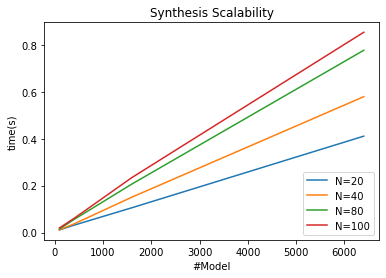

In [169]:
fig = plt.figure()
for N in [20,40,80,100]:
    plt.plot(df.loc[df['N'] == N,'M'], df.loc[df['N'] == N,'time'],\
             label='N='+str(N))
    plt.title('Synthesis Scalability')
    plt.xlabel("#Model")
    plt.ylabel("time(s)")
    plt.legend(loc='lower right')

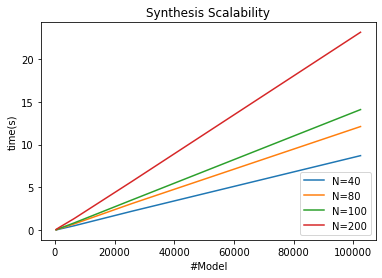

In [172]:
fig=plt.figure()
for N in [40,80,100,200]:
#     for M in [100 * 4 ** i for i in range(1,6)]:
    plt.plot(df.loc[df['N'] == N,'M'], df.loc[df['N'] == N,'time'],\
            label='N='+str(N))
plt.title('Synthesis Scalability')
plt.xlabel("#Model")
plt.ylabel("time(s)")
plt.legend(loc='lower right')

### Optimiztion runtime

In [200]:
path = 'simulation/run_summary.csv'
df_run = pd.read_csv(path,index_col=0)
df_run.head()

,M,N,#query,time
0,200.0,20.0,50.0,0.625579
1,200.0,20.0,100.0,1.793187
2,200.0,20.0,150.0,2.776522
3,200.0,20.0,200.0,3.445141
4,200.0,40.0,50.0,0.946925


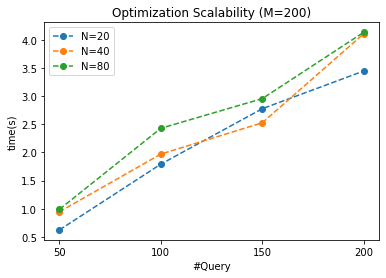

In [198]:
N_range = [20,40,80]
M = 200
df_run_200 = df_run.loc[df_run['M']==M,:]
legend_plot(N_range,df_run_200,'N','M=200')

[200, 400, 800, 1600]


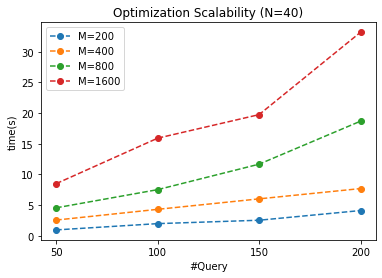

In [197]:
def legend_plot(_range, df,label,knob):
    fig=plt.figure()
    for N in _range:
        plt.plot(df.loc[df[label] == N,'#query'], df.loc[df[label] == N,'time'],\
                 label=label+'='+str(N),linestyle='--',marker='o')
    plt.title('Optimization Scalability ('+knob+')')
    plt.xticks(df.loc[df[label]==N,'#query'])
    plt.xlabel("#Query")
    plt.ylabel("time(s)")
    plt.legend()
    
M_range = [100*(2**i) for i in range(1,5)]
print(M_range)
N = 40
df_run_N_40 = df_run.loc[df_run['N']==N,:]
legend_plot(M_range,df_run_N_40,'M','N=40')

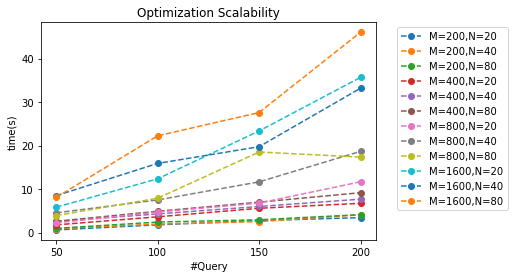

In [204]:
def legend_2d_plot(M_range,N_range, df):
    fig=plt.figure()
    for M in M_range:
        df_run_M = df_run.loc[df_run['M']==M,:]
        for N in N_range:
            plt.plot(df_run_M.loc[df_run_M['N'] == N,'#query'], df_run_M.loc[df_run_M['N'] == N,'time'],\
                 label='M='+str(M)+',N='+str(N),linestyle='--',marker='o')
    plt.title('Optimization Scalability')
    plt.xticks(df_run_M.loc[df_run_M['N']==N,'#query'])
    plt.xlabel("#Query")
    plt.ylabel("time(s)")
    plt.legend(bbox_to_anchor=(1.05, 1))

M_range = [100*(2**i) for i in range(1,5)]
N_range = [20,40,80]
legend_2d_plot(M_range,N_range, df_run)